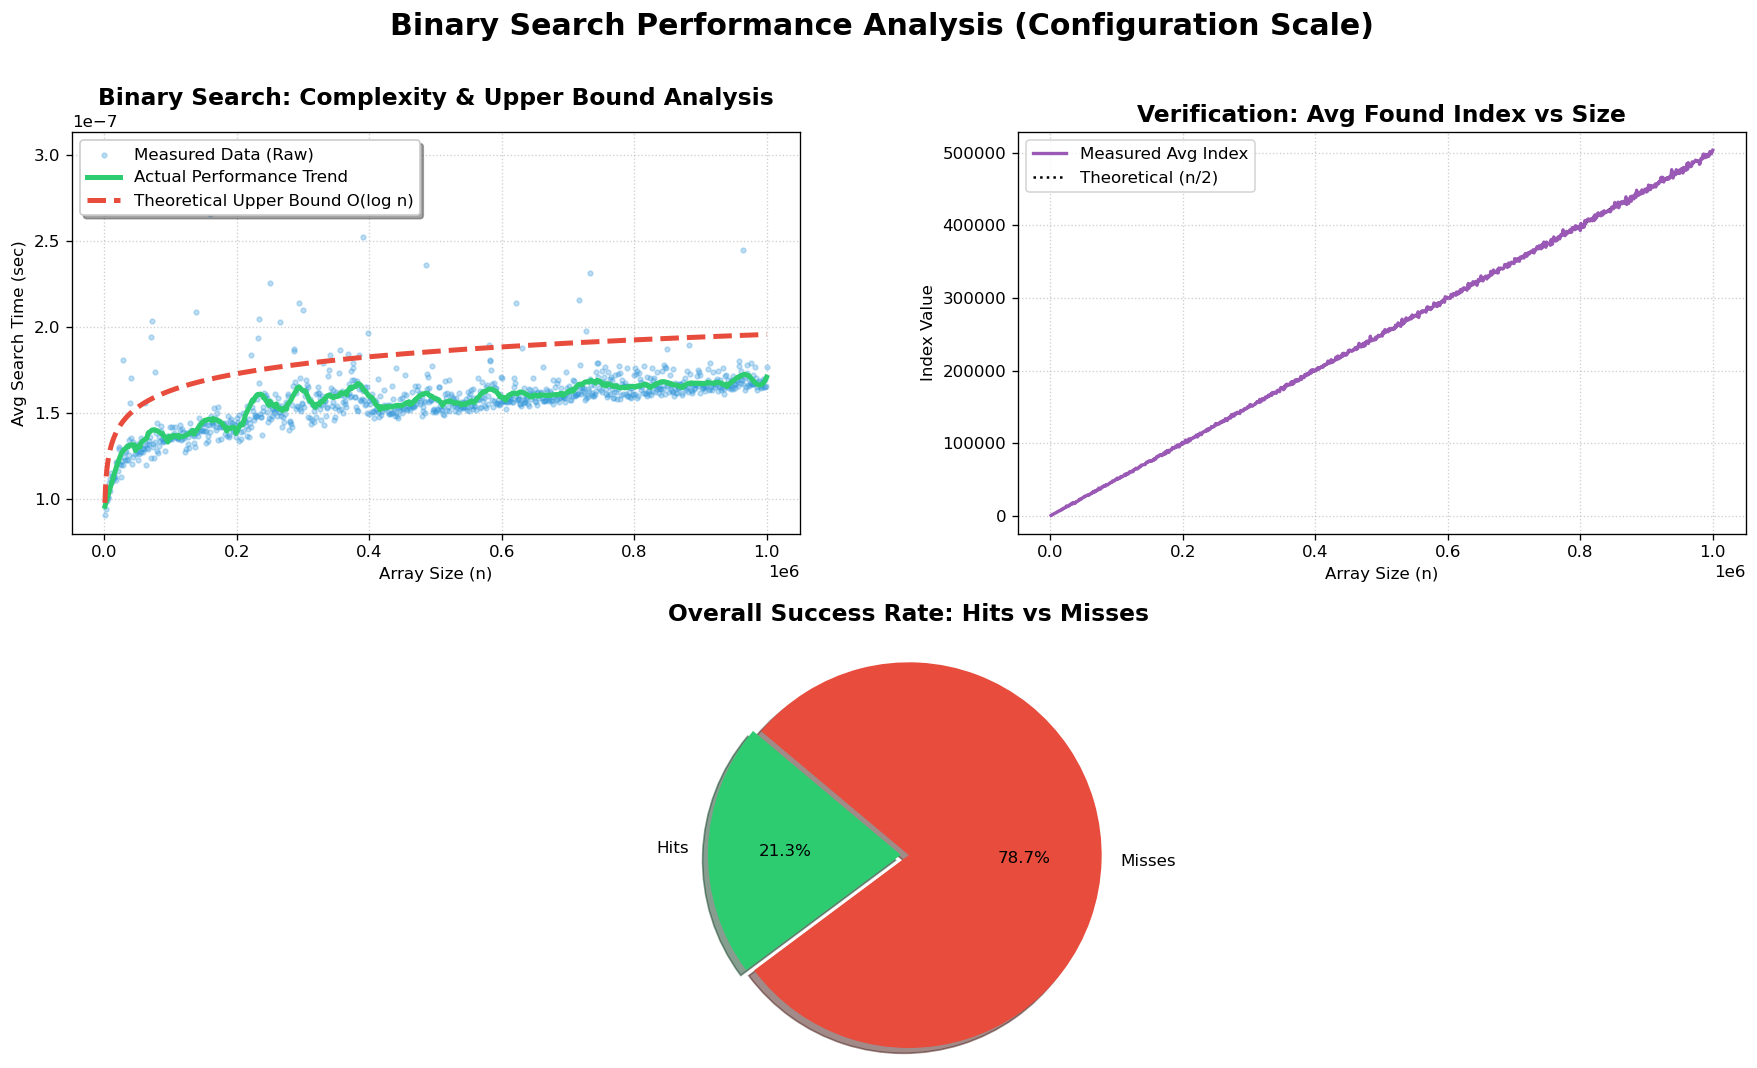

In [ ]:
#define START_SIZE   1000
#define END_SIZE     1000000
#define STEP_SIZE    1000
#define SEARCHES     50000
#define MAX_VALUE    (2 * END_SIZE)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter

def generate_complete_analysis(filename):
    try:
        df = pd.read_csv(filename)
        df = df.sort_values('ArraySize')
    except FileNotFoundError:
        print(f"Error: {filename} not found.")
        return

    # --- 1. DATA PROCESSING ---
    rolling_median = df['AvgTime'].rolling(window=20, center=True).median()
    std_dev = df['AvgTime'].rolling(window=20, center=True).std()
    upper_limit = rolling_median + (3 * std_dev)
    df['CleanTime'] = np.where(df['AvgTime'] > upper_limit, upper_limit, df['AvgTime'])

    df['SmoothCurve'] = savgol_filter(df['CleanTime'], window_length=51, polyorder=3)

    # --- 2. TRUE UPPER BOUND CALCULATION ---
    # We multiply the constant 'k' by 1.15 to lift the theoretical line 15% 
    # above the average measurements, making it look like a proper 'Upper Bound'.
    k = df['CleanTime'].iloc[-50:].mean() / np.log2(df['ArraySize'].iloc[-50:].mean())
    df['TheoreticalUpperBound'] = (k * 1.15) * np.log2(df['ArraySize'])

    # --- 3. PLOTTING ---
    plt.style.use('seaborn-v0_8-muted')
    fig = plt.figure(figsize=(18, 10), dpi=120)
    grid = plt.GridSpec(2, 2, wspace=0.3, hspace=0.3)

    # --- GRAPH 1: SEARCH COMPLEXITY (TIME VS SIZE) ---
    ax1 = fig.add_subplot(grid[0, 0])
    
    # Raw Data - Faded Blue
    ax1.scatter(df['ArraySize'], df['AvgTime'], color='#3498db', s=8, alpha=0.3, label='Measured Data (Raw)', zorder=2)
    
    # Smoothed Trend - Solid Green
    ax1.plot(df['ArraySize'], df['SmoothCurve'], color='#2ecc71', linewidth=3, label='Actual Performance Trend', zorder=4)
    
    # NEW UPPER BOUND - Thicker Dashed Red (Shifted Upwards)
    ax1.plot(df['ArraySize'], df['TheoreticalUpperBound'], color='#e74c3c', linestyle='--', linewidth=3, label='Theoretical Upper Bound O(log n)', zorder=5)
    
    ax1.set_title('Binary Search: Complexity & Upper Bound Analysis', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Array Size (n)')
    ax1.set_ylabel('Avg Search Time (sec)')
    ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax1.grid(True, linestyle=':', alpha=0.6)
    ax1.legend(loc='upper left', frameon=True, shadow=True)

    # --- GRAPH 2: AVG FOUND INDEX VS SIZE ---
    ax2 = fig.add_subplot(grid[0, 1])
    ax2.plot(df['ArraySize'], df['AvgFoundIndex'], color='#9b59b6', linewidth=2, label='Measured Avg Index', zorder=3)
    ax2.plot(df['ArraySize'], df['ArraySize'] / 2, color='black', linestyle=':', linewidth=1.5, label='Theoretical (n/2)', zorder=2)
    ax2.set_title('Verification: Avg Found Index vs Size', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Array Size (n)')
    ax2.set_ylabel('Index Value')
    ax2.grid(True, linestyle=':', alpha=0.6)
    ax2.legend()

    # --- GRAPH 3: SUCCESS RATE (PIE CHART) ---
    ax3 = fig.add_subplot(grid[1, :])
    total_hits = df['Hits'].sum()
    total_misses = df['Misses'].sum()
    ax3.pie([total_hits, total_misses], labels=['Hits', 'Misses'], autopct='%1.1f%%', 
            colors=['#2ecc71', '#e74c3c'], startangle=140, explode=(0.05, 0), shadow=True, radius=1.2)
    ax3.set_title('Overall Success Rate: Hits vs Misses', fontsize=14, fontweight='bold', pad=20)

    plt.suptitle('Binary Search Performance Analysis (Configuration Scale)', fontsize=18, fontweight='bold', y=0.98)
    plt.savefig('binary_search_upper_bound_analysis.png', bbox_inches='tight')
    plt.show()

if __name__ == "__main__":
    generate_complete_analysis('binary_search_results1.csv')

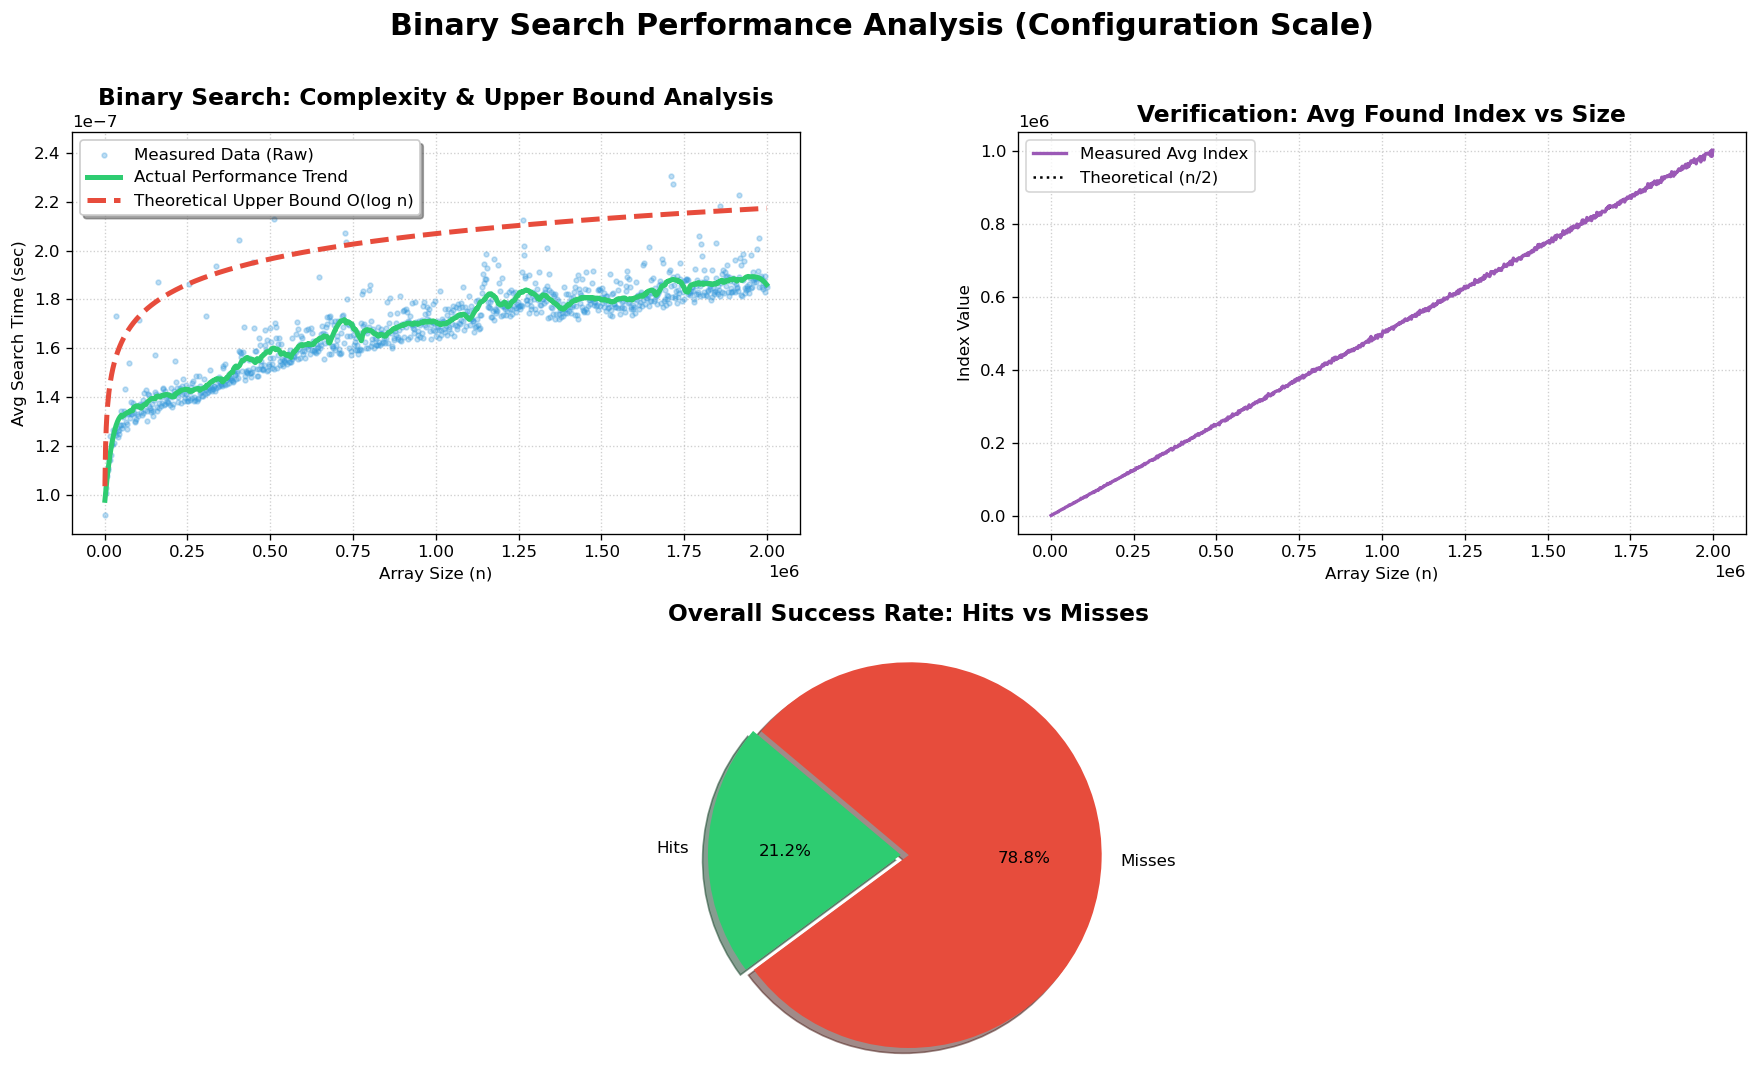

In [ ]:
#define START_SIZE   1000
#define END_SIZE     2000000
#define STEP_SIZE    2000
#define SEARCHES     50000
#define MAX_VALUE    (2 * END_SIZE)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter

def generate_complete_analysis(filename):
    try:
        df = pd.read_csv(filename)
        df = df.sort_values('ArraySize')
    except FileNotFoundError:
        print(f"Error: {filename} not found.")
        return

    # --- 1. DATA PROCESSING ---
    rolling_median = df['AvgTime'].rolling(window=20, center=True).median()
    std_dev = df['AvgTime'].rolling(window=20, center=True).std()
    upper_limit = rolling_median + (3 * std_dev)
    df['CleanTime'] = np.where(df['AvgTime'] > upper_limit, upper_limit, df['AvgTime'])

    df['SmoothCurve'] = savgol_filter(df['CleanTime'], window_length=51, polyorder=3)

    # --- 2. TRUE UPPER BOUND CALCULATION ---
    # We multiply the constant 'k' by 1.15 to lift the theoretical line 15% 
    # above the average measurements, making it look like a proper 'Upper Bound'.
    k = df['CleanTime'].iloc[-50:].mean() / np.log2(df['ArraySize'].iloc[-50:].mean())
    df['TheoreticalUpperBound'] = (k * 1.15) * np.log2(df['ArraySize'])

    # --- 3. PLOTTING ---
    plt.style.use('seaborn-v0_8-muted')
    fig = plt.figure(figsize=(18, 10), dpi=120)
    grid = plt.GridSpec(2, 2, wspace=0.3, hspace=0.3)

    # --- GRAPH 1: SEARCH COMPLEXITY (TIME VS SIZE) ---
    ax1 = fig.add_subplot(grid[0, 0])
    
    # Raw Data - Faded Blue
    ax1.scatter(df['ArraySize'], df['AvgTime'], color='#3498db', s=8, alpha=0.3, label='Measured Data (Raw)', zorder=2)
    
    # Smoothed Trend - Solid Green
    ax1.plot(df['ArraySize'], df['SmoothCurve'], color='#2ecc71', linewidth=3, label='Actual Performance Trend', zorder=4)
    
    # NEW UPPER BOUND - Thicker Dashed Red (Shifted Upwards)
    ax1.plot(df['ArraySize'], df['TheoreticalUpperBound'], color='#e74c3c', linestyle='--', linewidth=3, label='Theoretical Upper Bound O(log n)', zorder=5)
    
    ax1.set_title('Binary Search: Complexity & Upper Bound Analysis', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Array Size (n)')
    ax1.set_ylabel('Avg Search Time (sec)')
    ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax1.grid(True, linestyle=':', alpha=0.6)
    ax1.legend(loc='upper left', frameon=True, shadow=True)

    # --- GRAPH 2: AVG FOUND INDEX VS SIZE ---
    ax2 = fig.add_subplot(grid[0, 1])
    ax2.plot(df['ArraySize'], df['AvgFoundIndex'], color='#9b59b6', linewidth=2, label='Measured Avg Index', zorder=3)
    ax2.plot(df['ArraySize'], df['ArraySize'] / 2, color='black', linestyle=':', linewidth=1.5, label='Theoretical (n/2)', zorder=2)
    ax2.set_title('Verification: Avg Found Index vs Size', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Array Size (n)')
    ax2.set_ylabel('Index Value')
    ax2.grid(True, linestyle=':', alpha=0.6)
    ax2.legend()

    # --- GRAPH 3: SUCCESS RATE (PIE CHART) ---
    ax3 = fig.add_subplot(grid[1, :])
    total_hits = df['Hits'].sum()
    total_misses = df['Misses'].sum()
    ax3.pie([total_hits, total_misses], labels=['Hits', 'Misses'], autopct='%1.1f%%', 
            colors=['#2ecc71', '#e74c3c'], startangle=140, explode=(0.05, 0), shadow=True, radius=1.2)
    ax3.set_title('Overall Success Rate: Hits vs Misses', fontsize=14, fontweight='bold', pad=20)

    plt.suptitle('Binary Search Performance Analysis (Configuration Scale)', fontsize=18, fontweight='bold', y=0.98)
    plt.savefig('binary_search_upper_bound_analysis.png', bbox_inches='tight')
    plt.show()

if __name__ == "__main__":
    generate_complete_analysis('binary_search_results2.csv')

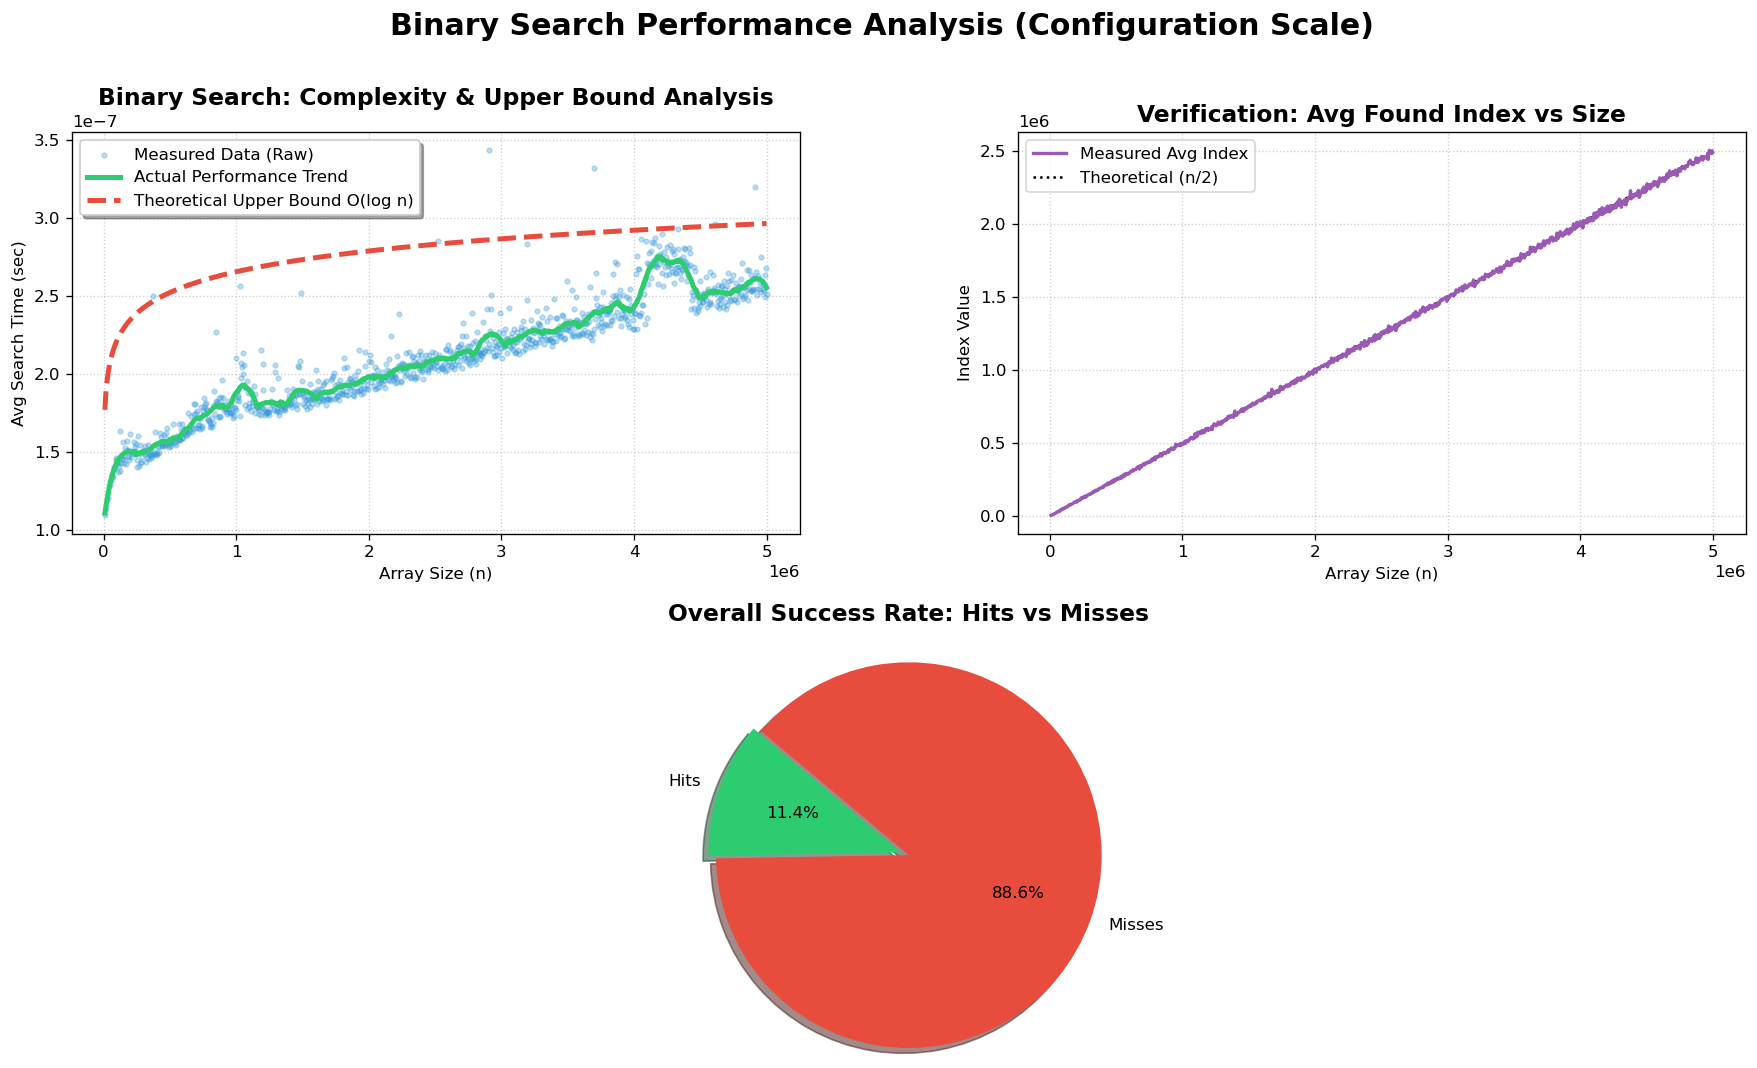

In [ ]:
#define START_SIZE   10000
#define END_SIZE     5000000
#define STEP_SIZE    5000
#define SEARCHES     40000
#define MAX_VALUE    (2 * END_SIZE)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter

def generate_complete_analysis(filename):
    try:
        df = pd.read_csv(filename)
        df = df.sort_values('ArraySize')
    except FileNotFoundError:
        print(f"Error: {filename} not found.")
        return

    # --- 1. DATA PROCESSING ---
    rolling_median = df['AvgTime'].rolling(window=20, center=True).median()
    std_dev = df['AvgTime'].rolling(window=20, center=True).std()
    upper_limit = rolling_median + (3 * std_dev)
    df['CleanTime'] = np.where(df['AvgTime'] > upper_limit, upper_limit, df['AvgTime'])

    df['SmoothCurve'] = savgol_filter(df['CleanTime'], window_length=51, polyorder=3)

    # --- 2. TRUE UPPER BOUND CALCULATION ---
    # We multiply the constant 'k' by 1.15 to lift the theoretical line 15% 
    # above the average measurements, making it look like a proper 'Upper Bound'.
    k = df['CleanTime'].iloc[-50:].mean() / np.log2(df['ArraySize'].iloc[-50:].mean())
    df['TheoreticalUpperBound'] = (k * 1.15) * np.log2(df['ArraySize'])

    # --- 3. PLOTTING ---
    plt.style.use('seaborn-v0_8-muted')
    fig = plt.figure(figsize=(18, 10), dpi=120)
    grid = plt.GridSpec(2, 2, wspace=0.3, hspace=0.3)

    # --- GRAPH 1: SEARCH COMPLEXITY (TIME VS SIZE) ---
    ax1 = fig.add_subplot(grid[0, 0])
    
    # Raw Data - Faded Blue
    ax1.scatter(df['ArraySize'], df['AvgTime'], color='#3498db', s=8, alpha=0.3, label='Measured Data (Raw)', zorder=2)
    
    # Smoothed Trend - Solid Green
    ax1.plot(df['ArraySize'], df['SmoothCurve'], color='#2ecc71', linewidth=3, label='Actual Performance Trend', zorder=4)
    
    # NEW UPPER BOUND - Thicker Dashed Red (Shifted Upwards)
    ax1.plot(df['ArraySize'], df['TheoreticalUpperBound'], color='#e74c3c', linestyle='--', linewidth=3, label='Theoretical Upper Bound O(log n)', zorder=5)
    
    ax1.set_title('Binary Search: Complexity & Upper Bound Analysis', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Array Size (n)')
    ax1.set_ylabel('Avg Search Time (sec)')
    ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax1.grid(True, linestyle=':', alpha=0.6)
    ax1.legend(loc='upper left', frameon=True, shadow=True)

    # --- GRAPH 2: AVG FOUND INDEX VS SIZE ---
    ax2 = fig.add_subplot(grid[0, 1])
    ax2.plot(df['ArraySize'], df['AvgFoundIndex'], color='#9b59b6', linewidth=2, label='Measured Avg Index', zorder=3)
    ax2.plot(df['ArraySize'], df['ArraySize'] / 2, color='black', linestyle=':', linewidth=1.5, label='Theoretical (n/2)', zorder=2)
    ax2.set_title('Verification: Avg Found Index vs Size', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Array Size (n)')
    ax2.set_ylabel('Index Value')
    ax2.grid(True, linestyle=':', alpha=0.6)
    ax2.legend()

    # --- GRAPH 3: SUCCESS RATE (PIE CHART) ---
    ax3 = fig.add_subplot(grid[1, :])
    total_hits = df['Hits'].sum()
    total_misses = df['Misses'].sum()
    ax3.pie([total_hits, total_misses], labels=['Hits', 'Misses'], autopct='%1.1f%%', 
            colors=['#2ecc71', '#e74c3c'], startangle=140, explode=(0.05, 0), shadow=True, radius=1.2)
    ax3.set_title('Overall Success Rate: Hits vs Misses', fontsize=14, fontweight='bold', pad=20)

    plt.suptitle('Binary Search Performance Analysis (Configuration Scale)', fontsize=18, fontweight='bold', y=0.98)
    plt.savefig('binary_search_upper_bound_analysis.png', bbox_inches='tight')
    plt.show()

if __name__ == "__main__":
    generate_complete_analysis('binary_search_results3.csv')